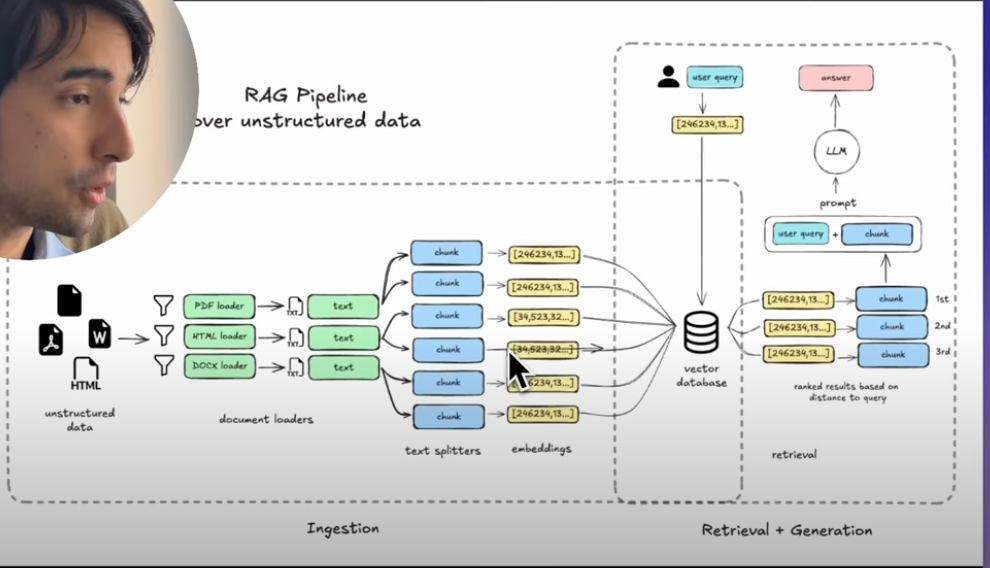

In [3]:
%pip install nest_asyncio

Note: you may need to restart the kernel to use updated packages.


In [4]:
import nest_asyncio
nest_asyncio.apply()

In [5]:
%pip install -Uq llama-index
%pip install -Uq llama-index-embeddings-huggingface


Note: you may need to restart the kernel to use updated packages.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.16.0 requires torch==2.1.0, but you have torch 2.8.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [6]:
from llama_index.core import SimpleDirectoryReader

docs = SimpleDirectoryReader('data').load_data()

2025-09-21 19:38:53,263 - INFO - NumExpr defaulting to 8 threads.


In [7]:
len(docs)

19

In [8]:
import pprint
pprint.pprint(docs[0])  # Print the first document's dictionary representation

Document(id_='a73a18df-6339-4c32-87c9-f68c402d054f', embedding=None, metadata={'page_label': '1', 'file_name': '2502.09838v3.pdf', 'file_path': '/Users/rishabhsaha/repo/Matplotlib-Case-studies/Notes/Working with Open AI/LlamaIndex/data/2502.09838v3.pdf', 'file_type': 'application/pdf', 'file_size': 8786923, 'creation_date': '2025-09-20', 'last_modified_date': '2025-09-20'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, metadata_template='{key}: {value}', metadata_separator='\n', text_resource=MediaResource(embeddings=None, data=None, text='HealthGPT: A Medical Large Vision-Language Model for Unifying\nComprehension and Generation via Heterogeneous Knowledge Adaptation\nTianwei Lin1, Wenqiao Zhang1, Sijing Li1, Yuqian Yuan1, Binhe Yu2, Haoyuan Li3, Wanggui He

# Extract

In [9]:
docs[0].__dict__

{'id_': 'a73a18df-6339-4c32-87c9-f68c402d054f',
 'embedding': None,
 'metadata': {'page_label': '1',
  'file_name': '2502.09838v3.pdf',
  'file_path': '/Users/rishabhsaha/repo/Matplotlib-Case-studies/Notes/Working with Open AI/LlamaIndex/data/2502.09838v3.pdf',
  'file_type': 'application/pdf',
  'file_size': 8786923,
  'creation_date': '2025-09-20',
  'last_modified_date': '2025-09-20'},
 'excluded_embed_metadata_keys': ['file_name',
  'file_type',
  'file_size',
  'creation_date',
  'last_modified_date',
  'last_accessed_date'],
 'excluded_llm_metadata_keys': ['file_name',
  'file_type',
  'file_size',
  'creation_date',
  'last_modified_date',
  'last_accessed_date'],
 'relationships': {},
 'metadata_template': '{key}: {value}',
 'metadata_separator': '\n',
 'text_resource': MediaResource(embeddings=None, data=None, text='HealthGPT: A Medical Large Vision-Language Model for Unifying\nComprehension and Generation via Heterogeneous Knowledge Adaptation\nTianwei Lin1, Wenqiao Zhang1, S

In [ ]:
import openai

openai.api_key = ""

In [11]:


from llama_index.llms.openai import OpenAI

llm_transformations = OpenAI(model="gpt-3.5-turbo")

In [12]:
from llama_index.core.extractors import (
    TitleExtractor,
    QuestionsAnsweredExtractor
)
from llama_index.core.node_parser import SentenceSplitter

text_splitter = SentenceSplitter(
    separator=" ", chunk_size=1024, chunk_overlap=128
)
title_extractor = TitleExtractor(llm=llm_transformations, node=5)
questions_answered_extractor = QuestionsAnsweredExtractor(llm=llm_transformations, questions=3)

from llama_index.core.ingestion import IngestionPipeline

ingestion_pipeline = IngestionPipeline(
    transformations=[
        text_splitter,
        title_extractor,
        questions_answered_extractor
    ]
)

nodes = ingestion_pipeline.run(
    documents = docs,
    in_place = True,
    show_progress = True
)

Parsing nodes:   0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]2025-09-21 19:38:56,520 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-09-21 19:38:56,533 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-09-21 19:38:56,609 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-09-21 19:38:56,637 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-09-21 19:38:57,033 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-09-21 19:38:57,341 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
  5%|▌         | 1/19 [00:01<00:34,  1.90s/it]2025-09-21 19:38:57,651 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-09-21 19:38:57,783 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-09-21 1

In [13]:
len(nodes)

31

In [14]:
pprint.pprint(nodes[0])

TextNode(id_='8e39cde0-8991-4ee6-a010-354a29dc4cc1', embedding=None, metadata={'page_label': '1', 'file_name': '2502.09838v3.pdf', 'file_path': '/Users/rishabhsaha/repo/Matplotlib-Case-studies/Notes/Working with Open AI/LlamaIndex/data/2502.09838v3.pdf', 'file_type': 'application/pdf', 'file_size': 8786923, 'creation_date': '2025-09-20', 'last_modified_date': '2025-09-20', 'document_title': 'HealthGPT: A Comprehensive Medical Vision-Language Model for Comprehension and Generation in Healthcare Applications', 'questions_this_excerpt_can_answer': '1. What is the purpose of the different membrane treatments used in a specific study involving microscopy comprehension?\n2. What specific findings or pathological changes can be observed in a fundus image according to the provided context?\n3. How does HealthGPT outperform both state-of-the-art unified visual models and medical-specific models across various tasks, as highlighted in Figure 1 of the document?'}, excluded_embed_metadata_keys=['f

In [15]:
from llama_index.core.schema import MetadataMode

print(nodes[0].get_content(metadata_mode=MetadataMode.LLM))

[Excerpt from document]
page_label: 1
file_path: /Users/rishabhsaha/repo/Matplotlib-Case-studies/Notes/Working with Open AI/LlamaIndex/data/2502.09838v3.pdf
document_title: HealthGPT: A Comprehensive Medical Vision-Language Model for Comprehension and Generation in Healthcare Applications
questions_this_excerpt_can_answer: 1. What is the purpose of the different membrane treatments used in a specific study involving microscopy comprehension?
2. What specific findings or pathological changes can be observed in a fundus image according to the provided context?
3. How does HealthGPT outperform both state-of-the-art unified visual models and medical-specific models across various tasks, as highlighted in Figure 1 of the document?
Excerpt:
-----
HealthGPT: A Medical Large Vision-Language Model for Unifying
Comprehension and Generation via Heterogeneous Knowledge Adaptation
Tianwei Lin1, Wenqiao Zhang1, Sijing Li1, Yuqian Yuan1, Binhe Yu2, Haoyuan Li3, Wanggui He3, Hao Jiang3,
Mengze Li4, Xi

## Index

In [16]:
from llama_index.embeddings.openai import OpenAIEmbedding

embedding = OpenAIEmbedding(model="text-embedding-3-small")

test_embedding = embedding.get_text_embedding("This is a test")
print(test_embedding)

2025-09-21 19:39:14,842 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


[0.009889289736747742, -0.005578675772994757, 0.00683477520942688, -0.03805781528353691, -0.01824733428657055, -0.04121600463986397, -0.007636285852640867, 0.03225184231996536, 0.018949154764413834, 9.352207416668534e-05, 0.058921024203300476, 0.012457314878702164, -0.023383384570479393, -0.019140560179948807, 0.025520747527480125, 0.02957216463983059, -0.08141118288040161, 0.0016917464090511203, -0.020065687596797943, 0.02828017808496952, 0.026302319020032883, -0.008740855380892754, 0.03955715894699097, 0.0029508364386856556, 0.027355050668120384, -0.04261964559555054, -0.024324461817741394, 0.0026079013478010893, 0.022298753261566162, -0.05531621724367142, 0.0466710664331913, -0.034325405955314636, -0.030672747641801834, -0.012872026301920414, -0.01655658520758152, -0.0003561440098565072, -0.006025288719683886, 0.03458061069250107, -0.03359168395400047, 0.0007641270640306175, -0.03611185774207115, -0.05254083871841431, 0.005223778076469898, -0.004581771790981293, 0.01882155053317547,

In [17]:
from llama_index.core import VectorStoreIndex

index = VectorStoreIndex(nodes, embedding=embedding)

2025-09-21 19:39:16,242 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


## Query

In [18]:
llm_query = OpenAI(model="gpt-3.5-turbo")

In [19]:
query_engine = index.as_query_engine(llm=llm_query)
response = query_engine.query("What does this model do?")
print(response)

2025-09-21 19:39:16,776 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-09-21 19:39:17,820 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


The model described in the document extends the textual vocabulary to include multimodal tokens, trains on image-VQ pairs to enable image reconstruction, fine-tunes the word embedding layer and output head of H-LoRA plugins to maintain consistency in model weights, and introduces additional task-specific data to enhance adaptability to downstream tasks such as medical visual comprehension and generation tasks.


In [20]:
response.__dict__

{'response': 'The model described in the document extends the textual vocabulary to include multimodal tokens, trains on image-VQ pairs to enable image reconstruction, fine-tunes the word embedding layer and output head of H-LoRA plugins to maintain consistency in model weights, and introduces additional task-specific data to enhance adaptability to downstream tasks such as medical visual comprehension and generation tasks.',
 'source_nodes': [NodeWithScore(node=TextNode(id_='a61ad848-0886-49b0-81d7-873f705d85d2', embedding=None, metadata={'page_label': '5', 'file_name': '2502.09838v3.pdf', 'file_path': '/Users/rishabhsaha/repo/Matplotlib-Case-studies/Notes/Working with Open AI/LlamaIndex/data/2502.09838v3.pdf', 'file_type': 'application/pdf', 'file_size': 8786923, 'creation_date': '2025-09-20', 'last_modified_date': '2025-09-20', 'document_title': '"Enhancing Language-Visual Models for Health Training through Multi-modal Integration, Heterogeneous Knowledge Adaptation, and Unified Tas

In [21]:
pprint.pprint(response.source_nodes)

[NodeWithScore(node=TextNode(id_='a61ad848-0886-49b0-81d7-873f705d85d2', embedding=None, metadata={'page_label': '5', 'file_name': '2502.09838v3.pdf', 'file_path': '/Users/rishabhsaha/repo/Matplotlib-Case-studies/Notes/Working with Open AI/LlamaIndex/data/2502.09838v3.pdf', 'file_type': 'application/pdf', 'file_size': 8786923, 'creation_date': '2025-09-20', 'last_modified_date': '2025-09-20', 'document_title': '"Enhancing Language-Visual Models for Health Training through Multi-modal Integration, Heterogeneous Knowledge Adaptation, and Unified Task Expansion"', 'questions_this_excerpt_can_answer': '1. How does the model in the document ensure pixel-level consistency between pre-trained LLM outputs and visual inputs?\n2. What specific techniques are used in the document to fine-tune the word embedding layer and output head of the H-LoRA plugins to maintain consistency in model weights?\n3. How does the document suggest enhancing the adaptability of the model to downstream tasks such as 

## Vector Store

In [22]:
%pip install -Uq chromadb
%pip install -Uq llama-index-vector-stores-chroma

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [26]:
import chromadb
from llama_index.vector_stores.chroma import ChromaVectorStore
from llama_index.core import StorageContext, VectorStoreIndex

db = chromadb.PersistentClient(path="./chroma_db")

chroma_collection = db.get_or_create_collection(name="healthGPT")


vector_store = ChromaVectorStore(chroma_collection)
storage_context= StorageContext.from_defaults(vector_store=vector_store)

index = VectorStoreIndex(nodes, storage_context=storage_context, embedding=embedding)

query_engine = index.as_query_engine(llm=llm_query)

2025-09-21 19:41:33,550 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


In [27]:
response = query_engine.query("What does this model do?")

2025-09-21 19:41:36,001 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-09-21 19:41:36,971 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


In [28]:
print(response)

The model described in the document extends the textual vocabulary to include multimodal tokens, trains on image-VQ pairs to enable image reconstruction, fine-tunes the word embedding layer and output head of H-LoRA plugins to maintain consistency in model weights, and introduces additional task-specific data to enhance adaptability to downstream tasks such as medical visual comprehension and generation tasks.
